________________________________________
# **Project Overview**
________________________________________
This project aims to analyze e-commerce sales data to uncover insights into sales performance, product category trends, seasonality, and customer preferences. By exploring patterns in order fulfillment, promotions, and geographic sales distribution, the project will provide actionable recommendations to help businesses optimize marketing strategies, enhance customer targeting, and boost sales performance.

**Scope of the Project:**

The analysis is designed to be exhaustive and insights-driven, covering detailed descriptive and inferential investigations. The goal is to explore the dataset to extract meaningful trends, test hypotheses, and derive data-driven insights that contribute to business decision-making processes.

## **Key Areas of Focus**
**Sales Performance Analysis:**

- Evaluating total sales, revenue, and order quantity.
- Identifying top-performing product categories, SKUs, and sales channels.
- Measuring average order value and revenue trends.

**Seasonality and Time Trends:**

- Uncovering monthly and seasonal trends in sales performance.
- Analyzing peak sales periods and high cancellation months.

**Customer and Geographic Insights:**

- Analyzing customer behavior based on location (city/state).
- Understanding the relationship between shipping service levels and geographic regions.

**Promotions and Discounts:**

- Evaluating the impact of promotions on order volume and revenue.
- Comparing performance between promoted and non-promoted orders.

**Order Fulfillment Insights:**

- Assessing the differences in performance between orders fulfilled by Amazon and merchants.
- Analyzing the impact of shipping service levels (Standard vs. Expedited) on sales performance.

**Inferential Analysis and Hypothesis Testing:**

*Testing relationships and significant differences across key variables:*
- Promotion effectiveness
- Fulfillment method impact
- Geographic variations in sales and cancellations


### **Expected Outcomes**

*By conducting this analysis, the project will deliver:*

- Comprehensive insights into sales trends, customer preferences, and product performance.
- Key findings on the effectiveness of promotions, fulfillment strategies, and time-based sales patterns.
- Data-driven recommendations to optimize marketing strategies, reduce cancellations, and improve sales performance.

**Business Impact:**

*The findings will empower businesses to:*

- Improve product targeting and inventory management.
- Enhance marketing strategies through insights on seasonality and promotions.
- Optimize fulfillment methods to increase customer satisfaction and reduce cancellations.
- Identify high-performing categories and target locations to maximize revenue growth.
**Tools and Techniques**

*The project will employ:*

- Data Analysis: Python (Pandas, NumPy), statistical methods, and hypothesis testing.
- Visualization: Matplotlib, Seaborn for trends and distribution analysis.
- Statistical Tests: Comparative tests, correlation analysis, and significance testing.
- Reporting: Actionable insights with visualized results for clarity and decision-making.



________________________________________
## Imports
________________________________________

In [77]:
# Standard Data Science Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns

# Inferential Statistical Tests
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

________________________________________
## Data
________________________________________

In [78]:
file_path = "cleaned_ecommerce_data.csv"

ecommerce_data = pd.read_csv(file_path)

ecommerce_data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,...,1,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
3,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-L,Set,...,1,INR,771.0,MUMBAI,MAHARASHTRA,400053.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
4,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,...,1,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [79]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               32395 non-null  int64  
 1   Order ID            32395 non-null  object 
 2   Date                32395 non-null  object 
 3   Status              32395 non-null  object 
 4   Fulfilment          32395 non-null  object 
 5   Sales Channel       32395 non-null  object 
 6   ship-service-level  32395 non-null  object 
 7   Style               32395 non-null  object 
 8   SKU                 32395 non-null  object 
 9   Category            32395 non-null  object 
 10  Size                32395 non-null  object 
 11  ASIN                32395 non-null  object 
 12  Courier Status      32395 non-null  object 
 13  Qty                 32395 non-null  int64  
 14  currency            32395 non-null  object 
 15  Amount              32395 non-null  float64
 16  ship

In [80]:
ecommerce_data.describe()

,index,Qty,Amount,ship-postal-code
count,32395.000000,32395.000000,32395.000000,32395.000000
mean,60956.478160,1.004846,650.522920,462097.701096
std,36843.686311,0.085035,284.913465,194276.943115
min,1.000000,1.000000,0.000000,110001.000000
25%,27188.500000,1.000000,459.000000,370001.000000
50%,63461.000000,1.000000,631.000000,500017.000000
75%,91761.500000,1.000000,771.000000,600037.000000
max,128891.000000,5.000000,5495.000000,855115.000000


- Qty (quantity): Average 1.00, maximum 5.00.
- Amount (amount): Average 650.52, standard deviation 284.91, maximum 5,495.00.
- Ship-postal-code: Average 462097.70.

________________________________________
# Descriptive Analysis Questions
________________________________________
| **Category**                   | **Questions**                                                                                   |
|--------------------------------|-----------------------------------------------------------------------------------------------|
| **General Sales Insights**     | 1. What is the total number of orders placed?                                                |
|                                | 2. What is the total revenue generated?                                                     |
|                                | 3. What is the average order value across all orders?                                       |
|                                | 4. What are the top 10 best-selling product categories by total sales?                      |
|                                | 5. Which SKUs (product codes) have the highest total quantity sold?                         |
|                                | 6. Which SKUs generate the highest revenue?                                                |
|                                | 7. What are the monthly sales trends over time? (group by Date)                             |
|                                | 8. Which fulfillment method (Fulfilment) contributes the most to sales?                     |
|                                | 9. What is the distribution of Status (shipped, canceled, etc.)?                            |
|                                | 10. Which Sales Channel generates the most sales and revenue?                               |
|                                | 11. What is the average order quantity (Qty) across different categories?                   |
| **Seasonality & Time Trends**  | 12. What are the peak sales months and seasons?                                             |
|                                | 13. Is there a weekly or daily pattern in sales volume?                                     |
|                                | 14. Which months show the highest cancellation rates?                                       |
| **Customer Location Trends**   | 15. Which ship-city and ship-state have the most orders?                                    |
|                                | 16. What is the average revenue per shipping state or city?                                 |
|                                | 17. Which states or cities have the highest cancellation rates?                             |
| **Promotions & Discounts**     | 18. How many orders included promotion-ids?                                                 |
|                                | 19. What is the average revenue of promoted vs. non-promoted orders?                        |
|                                | 20. Which promotions were the most frequently used?                                         |
| **Fulfillment Methods**        | 21. What is the split between orders fulfilled by Amazon and merchants?                     |
|                                | 22. What is the average order value for Amazon-fulfilled orders vs. Merchant-fulfilled?     |
|                                | 23. What is the distribution of ship-service-level (Standard vs. Expedited)?                |


In [81]:
#1.What is the total number of orders placed?
total_orders = len(ecommerce_data)
print("Total number of orders placed:", total_orders)


Total number of orders placed: 32395


In [82]:
#2.What is the total revenue generated?
total_revenue = ecommerce_data['Amount'].sum()
print("Total revenue generated:", total_revenue)


Total revenue generated: 21073690.0


In [83]:
#3.What is the average order value across all orders?
average_order_value = ecommerce_data['Amount'].mean()
print("Average Order Value:", round(average_order_value, 2))

Average Order Value: 650.52


In [84]:
#4.What are the top 10 best-selling product categories by total sales?
top_categories = ecommerce_data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Product Categories by Total Sales:")
print(top_categories)

Top 10 Best-Selling Product Categories by Total Sales:
Category
Set              10020659.0
kurta             5281253.0
Western Dress     4355042.0
Top               1070390.0
Ethnic Dress       178964.0
Blouse              93390.0
Bottom              54067.0
Saree               19925.0
Name: Amount, dtype: float64


In [85]:
#5.Which SKUs (product codes) have the highest total quantity sold?
top_skus = ecommerce_data.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(20)
print("Top 20 SKUs with the Highest Total Quantity Sold:")
print(top_skus)

Top 20 SKUs with the Highest Total Quantity Sold:
SKU
JNE3797-KR-L        456
JNE3797-KR-M        423
JNE3797-KR-S        307
SET183-KR-DH-M      288
JNE3797-KR-XL       284
JNE3797-KR-XXL      192
JNE3797-KR-XXXL     180
J0003-SET-M         179
JNE3797-KR-XS       169
JNE3405-KR-M        161
J0003-SET-XL        103
J0003-SET-XXL        97
J0341-DR-M           96
J0003-SET-L          94
J0003-SET-S          90
JNE3798-KR-M         89
JNE3798-KR-XL        89
J0341-DR-L           88
SET324-KR-NP-M       86
SET397-KR-NP  -M     81
Name: Qty, dtype: int64


In [86]:
#6.Which SKUs generate the highest revenue?
top_revenue_skus = ecommerce_data.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 SKUs Generating the Highest Revenue:")
print(top_revenue_skus)

Top 10 SKUs Generating the Highest Revenue:
SKU
JNE3797-KR-L        329992.0
JNE3797-KR-M        305375.0
JNE3797-KR-S        224607.0
SET183-KR-DH-M      217050.0
JNE3797-KR-XL       210574.0
JNE3797-KR-XXL      135132.0
JNE3797-KR-XXXL     132219.0
JNE3797-KR-XS       125019.0
J0003-SET-M         117322.0
SET397-KR-NP  -M     86632.0
Name: Amount, dtype: float64


In [87]:
#7.What are the monthly sales trends over time? (group by Date)

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'], errors='coerce')

ecommerce_data['Year-Month'] = ecommerce_data['Date'].dt.to_period('M')

monthly_sales_trends = ecommerce_data.groupby('Year-Month')['Amount'].sum().reset_index()

monthly_sales_trends['Year-Month'] = monthly_sales_trends['Year-Month'].astype(str)

print("Monthly Sales Trends:")
print(monthly_sales_trends)



Monthly Sales Trends:
  Year-Month     Amount
0    2022-03    10797.0
1    2022-04  8020286.0
2    2022-05  7415300.0
3    2022-06  5627307.0


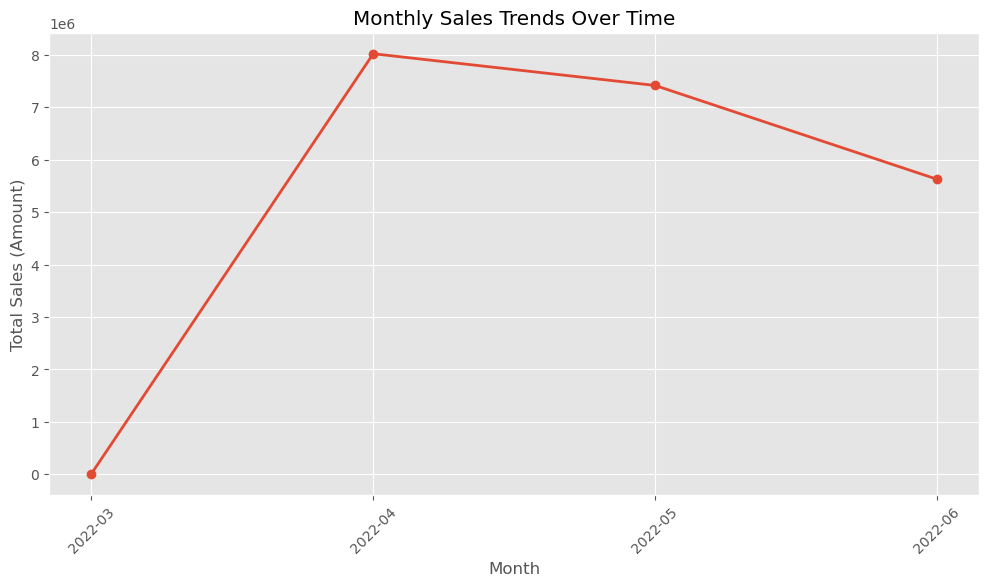

In [88]:

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_trends['Year-Month'], monthly_sales_trends['Amount'], marker='o', linestyle='-', linewidth=2)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (Amount)")
plt.grid(True)
plt.show()

In [89]:
#8.Which fulfillment method (Fulfilment) contributes the most to sales?

fulfilment_sales = ecommerce_data.groupby('Fulfilment')['Amount'].sum().reset_index()

fulfilment_sales = fulfilment_sales.sort_values(by='Amount', ascending=False)

print("Sales Contribution by Fulfilment Method:")
print(fulfilment_sales)

Sales Contribution by Fulfilment Method:
  Fulfilment      Amount
0   Merchant  21073690.0


In [90]:
#9.What is the distribution of Status?
status_distribution = ecommerce_data['Status'].value_counts()
print("Distribution of Order Status:")
print(status_distribution)

Distribution of Order Status:
Status
Shipped - Delivered to Buyer     28754
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending - Waiting for Pick Up      281
Pending                            243
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


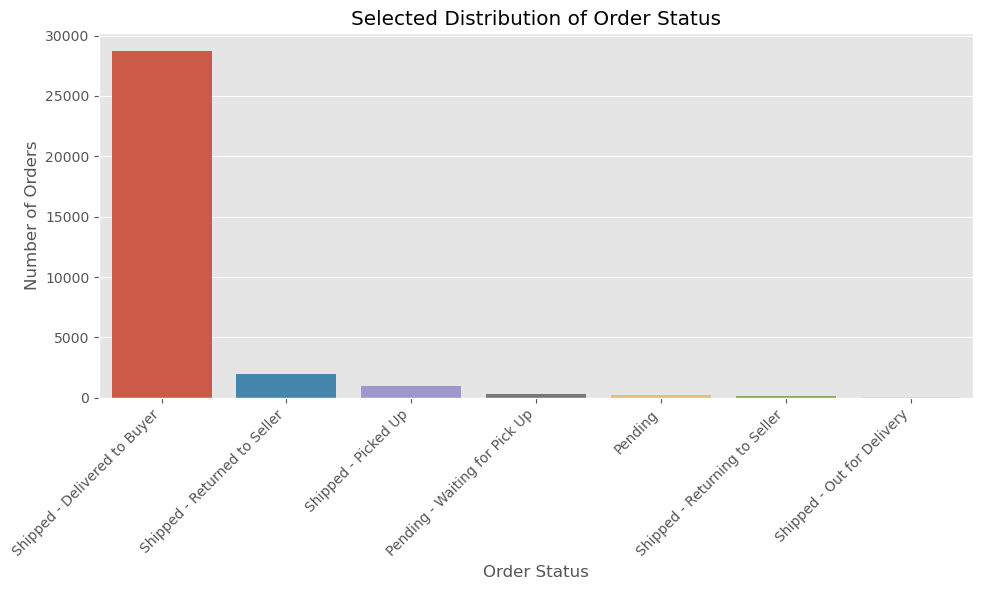

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_status = ['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller',
                   'Shipped - Picked Up', 'Pending - Waiting for Pick Up',
                   'Pending', 'Shipped - Returning to Seller', 'Shipped - Out for Delivery']

filtered_status = status_distribution.loc[selected_status]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_status.index, y=filtered_status.values, hue=filtered_status.index, 
            dodge=False, legend=False) 
plt.xticks(rotation=45, ha="right")
plt.title("Selected Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [92]:
ecommerce_data.columns = ecommerce_data.columns.str.strip()
print(ecommerce_data.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Year-Month'],
      dtype='object')


In [93]:
#10.Which Sales Channel generates the most sales and revenue?

ecommerce_data.columns = ecommerce_data.columns.str.strip()
sales_channel_revenue = ecommerce_data.groupby('Sales Channel')['Amount'].sum().reset_index()
sales_channel_revenue = sales_channel_revenue.sort_values(by='Amount', ascending=False)

print("Total Revenue by Sales Channel:")
print(sales_channel_revenue)

Total Revenue by Sales Channel:
  Sales Channel      Amount
0     Amazon.in  21073690.0


In [94]:
#11.What is the average order quantity (Qty) across different categories?
avg_order_qty = ecommerce_data.groupby('Category')['Qty'].mean().reset_index()

# Sort the results by 'Qty' in descending order
avg_order_qty = avg_order_qty.sort_values(by='Qty', ascending=False)

# Display the average order quantity by category
print("Average Order Quantity by Category:")
print(avg_order_qty)

Average Order Quantity by Category:
        Category       Qty
3          Saree  1.041667
1         Bottom  1.019108
0         Blouse  1.016304
2   Ethnic Dress  1.011811
7          kurta  1.005834
6  Western Dress  1.004955
5            Top  1.004165
4            Set  1.003387


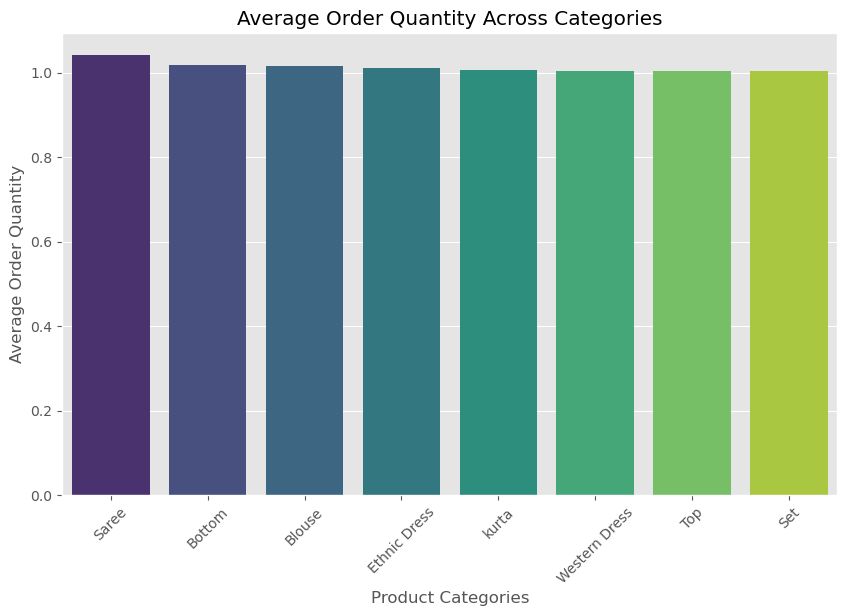

In [95]:
avg_order_qty = ecommerce_data.groupby('Category')['Qty'].mean().reset_index()
avg_order_qty = avg_order_qty.sort_values(by='Qty', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Qty', data=avg_order_qty, hue='Category', palette='viridis', legend=False)
plt.title("Average Order Quantity Across Categories")
plt.xlabel("Product Categories")
plt.ylabel("Average Order Quantity")

plt.xticks(rotation=45)
plt.show()


In [96]:
#12.What are the peak sales months and seasons?

ecommerce_data['Month'] = pd.to_datetime(ecommerce_data['Date']).dt.month
ecommerce_data['Year'] = pd.to_datetime(ecommerce_data['Date']).dt.year

monthly_sales = ecommerce_data.groupby('Month')['Amount'].sum().reset_index()

month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: month_names[x-1])

# Sort by total sales to highlight peak months
monthly_sales = monthly_sales.sort_values(by='Amount', ascending=False)


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\3934689191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Amount', data=monthly_sales, palette='viridis')


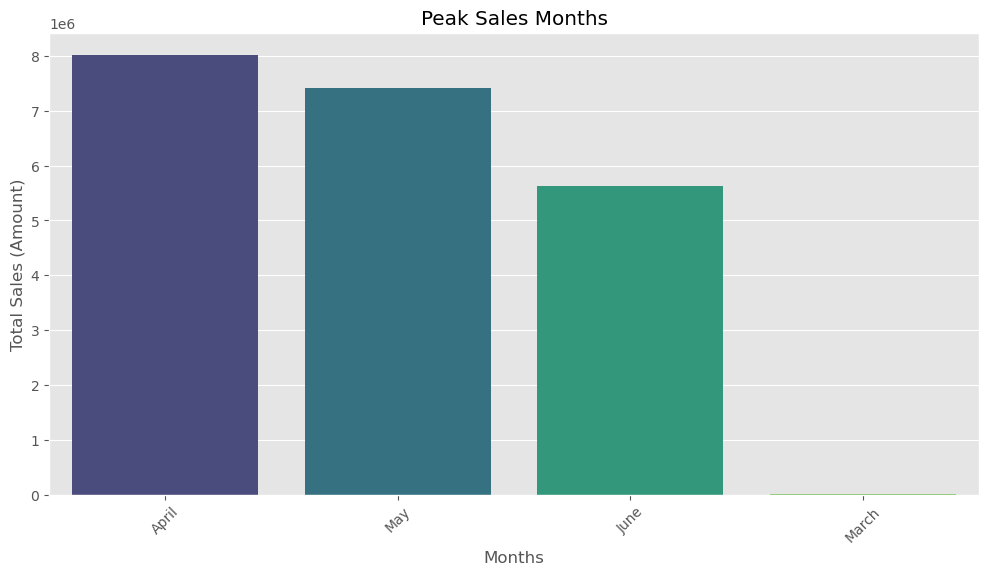

Total Sales by Month:
   Month     Amount
1  April  8020286.0
2    May  7415300.0
3   June  5627307.0
0  March    10797.0


In [97]:
# Visualize Peak Sales by Month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Amount', data=monthly_sales, palette='viridis')

plt.title("Peak Sales Months")
plt.xlabel("Months")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.show()

# Print the data for clarity
print("Total Sales by Month:")
print(monthly_sales)

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric months to their respective seasons
season_mapping = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Ensure the 'Date' column is in datetime format
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

# Extract the numeric month from the 'Date' column
ecommerce_data['Month'] = ecommerce_data['Date'].dt.month

# Add a 'Season' column
ecommerce_data['Season'] = ecommerce_data['Month'].map(season_mapping)

# Group by Season and calculate total sales
seasonal_sales = ecommerce_data.groupby('Season')['Amount'].sum().reset_index()

# Sort for visualization
seasonal_sales = seasonal_sales.sort_values(by='Amount', ascending=False)



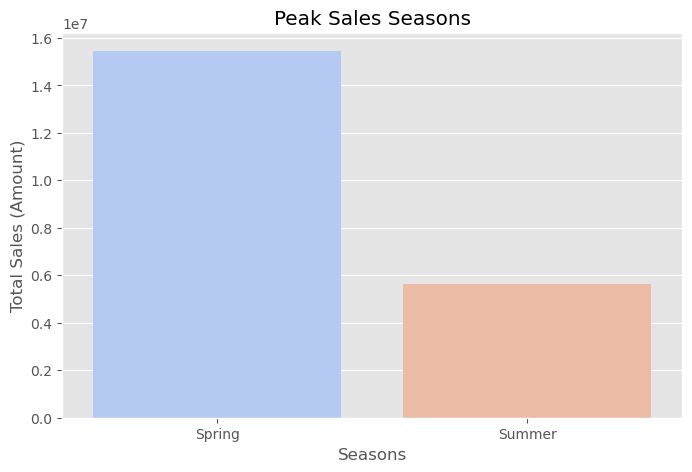

Total Sales by Season:
   Season      Amount
0  Spring  15446383.0
1  Summer   5627307.0


In [99]:
# Visualize Peak Sales by Season
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Amount', data=seasonal_sales, hue='Season', legend=False, palette='coolwarm')

plt.title("Peak Sales Seasons")
plt.xlabel("Seasons")
plt.ylabel("Total Sales (Amount)")
plt.show()

# Print the data for clarity
print("Total Sales by Season:")
print(seasonal_sales)


In [100]:
#13.Is there a weekly or daily pattern in sales volume?

ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

ecommerce_data['Day of Week'] = ecommerce_data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
ecommerce_data['Day Name'] = ecommerce_data['Date'].dt.day_name()

daily_sales = ecommerce_data.groupby('Day Name')['Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\3207459265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day Name', y='Amount', data=daily_sales, palette='viridis')


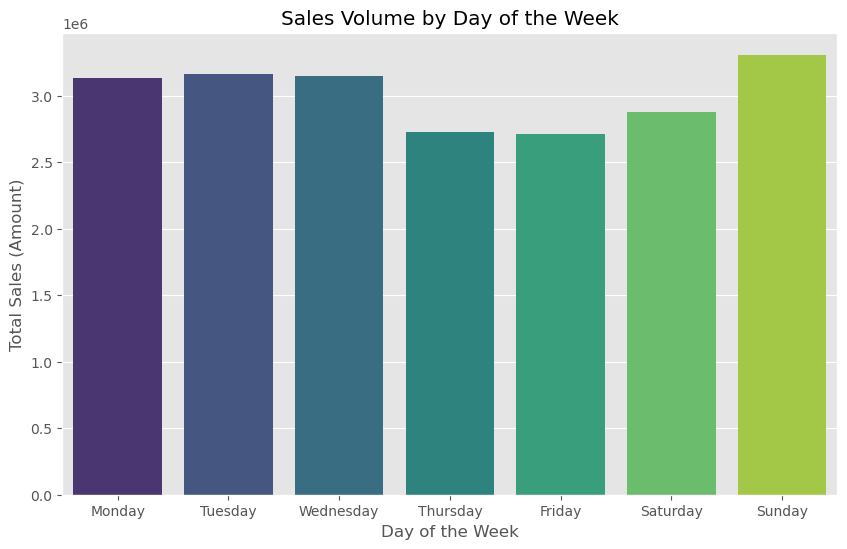

In [101]:
# Plot Sales by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Name', y='Amount', data=daily_sales, palette='viridis')
plt.title('Sales Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Amount)')
plt.show()

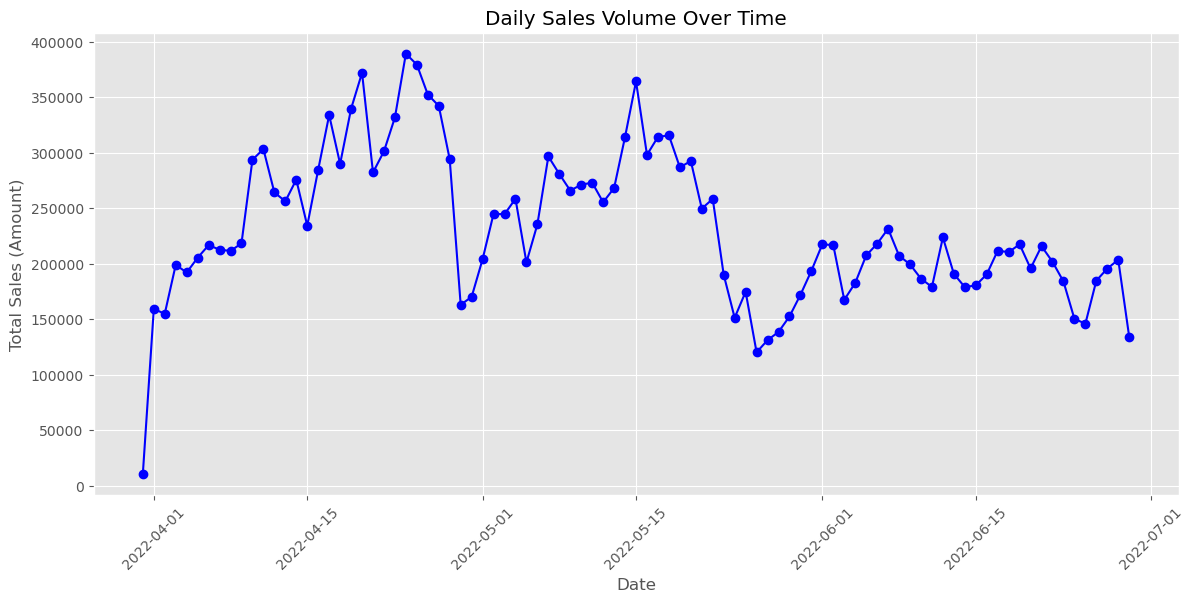

In [102]:
daily_trends = ecommerce_data.groupby('Date')['Amount'].sum().reset_index()
# Plot Daily Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(daily_trends['Date'], daily_trends['Amount'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.show()

In [103]:
# Print summarized data for clarity
print("Total Sales by Day of the Week:")
print(daily_sales)

print("\nDaily Sales Trend Overview:")
print(daily_trends.head())

Total Sales by Day of the Week:
    Day Name     Amount
0     Monday  3134798.0
1    Tuesday  3165235.0
2  Wednesday  3149195.0
3   Thursday  2728683.0
4     Friday  2711727.0
5   Saturday  2876220.0
6     Sunday  3307832.0

Daily Sales Trend Overview:
        Date    Amount
0 2022-03-31   10797.0
1 2022-04-01  159098.0
2 2022-04-02  154924.0
3 2022-04-03  198900.0
4 2022-04-04  192028.0


In [104]:
#14.Which months show the highest cancellation rates?
# Ensure 'Date' column is in datetime format
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

# Extract Month Name and Month Number
ecommerce_data['Month'] = ecommerce_data['Date'].dt.month_name()
ecommerce_data['Month_Num'] = ecommerce_data['Date'].dt.month

# Define cancellation statuses
cancellation_statuses = [
    "Shipped - Returned to Seller", 
    "Shipped - Rejected by Buyer", 
    "Shipped - Lost in Transit", 
    "Pending - Waiting for Pick Up", 
    "Pending"
]

canceled_orders = ecommerce_data[ecommerce_data['Status'].isin(cancellation_statuses)]

total_orders_per_month = ecommerce_data.groupby('Month')['Order ID'].count()

canceled_orders_per_month = canceled_orders.groupby('Month')['Order ID'].count()

cancellation_rate = (canceled_orders_per_month / total_orders_per_month) * 100
cancellation_rate = cancellation_rate.reset_index().rename(columns={'Order ID': 'Cancellation Rate (%)'})

cancellation_rate['Month_Num'] = cancellation_rate['Month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
cancellation_rate = cancellation_rate.sort_values(by='Month_Num')


# Print the Cancellation Rate data
print("Cancellation Rates by Month:")
print(cancellation_rate[['Month', 'Cancellation Rate (%)']])



Cancellation Rates by Month:
   Month  Cancellation Rate (%)
2  March               5.882353
0  April               6.933744
3    May               6.339358
1   June              10.643953


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\4147241550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Cancellation Rate (%)', data=cancellation_rate, palette='coolwarm')


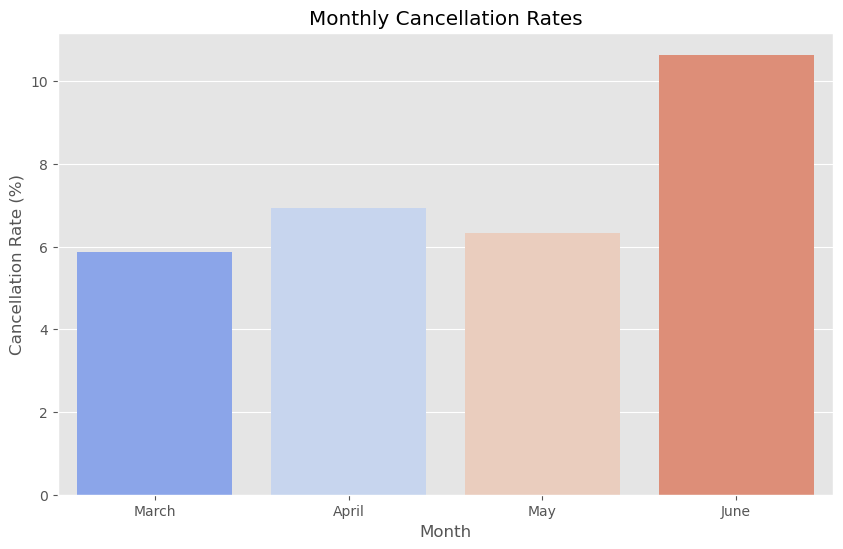

In [105]:
# Visualize Cancellation Rates by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Cancellation Rate (%)', data=cancellation_rate, palette='coolwarm')
plt.title('Monthly Cancellation Rates')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.show()

In [106]:
#15.Which ship-city and ship-state have the most orders?

# Group by ship-city and count the number of orders
city_orders = ecommerce_data.groupby('ship-city')['Order ID'].count().reset_index()
city_orders = city_orders.rename(columns={'Order ID': 'Total Orders'})
city_orders = city_orders.sort_values(by='Total Orders', ascending=False).head(10)

# Group by ship-state and count the number of orders
state_orders = ecommerce_data.groupby('ship-state')['Order ID'].count().reset_index()
state_orders = state_orders.rename(columns={'Order ID': 'Total Orders'})
state_orders = state_orders.sort_values(by='Total Orders', ascending=False)

print("Top 10 Ship-Cities with the Most Orders:")
print(city_orders)

print("\nTop 10 Ship-States with the Most Orders:")
print(state_orders.head(10))


Top 10 Ship-Cities with the Most Orders:
      ship-city  Total Orders
387   BENGALURU          2553
1392  HYDERABAD          1885
2353     MUMBAI          1516
2647  NEW DELHI          1463
707     CHENNAI          1200
3025       PUNE           944
1820    KOLKATA           573
1249   GURUGRAM           416
2129    LUCKNOW           395
3706      THANE           393

Top 10 Ship-States with the Most Orders:
        ship-state  Total Orders
26     MAHARASHTRA          5429
21       KARNATAKA          4008
49   UTTAR PRADESH          2810
47       TELANGANA          2708
46      TAMIL NADU          2702
22          KERALA          1860
12           DELHI          1706
51     WEST BENGAL          1405
1   ANDHRA PRADESH          1366
16         Gujarat          1206


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\3524716240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='ship-city', data=city_orders, palette='viridis')


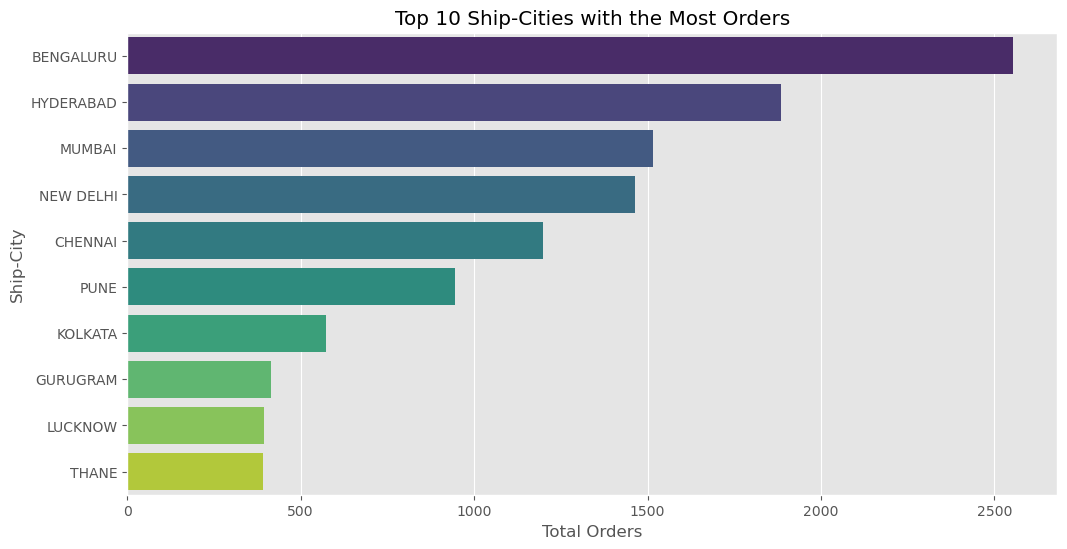

In [107]:
# Visualize the top 10 ship-cities
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Orders', y='ship-city', data=city_orders, palette='viridis')
plt.title('Top 10 Ship-Cities with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Ship-City')
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\2660831927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='ship-state', data=state_orders.head(10), palette='coolwarm')


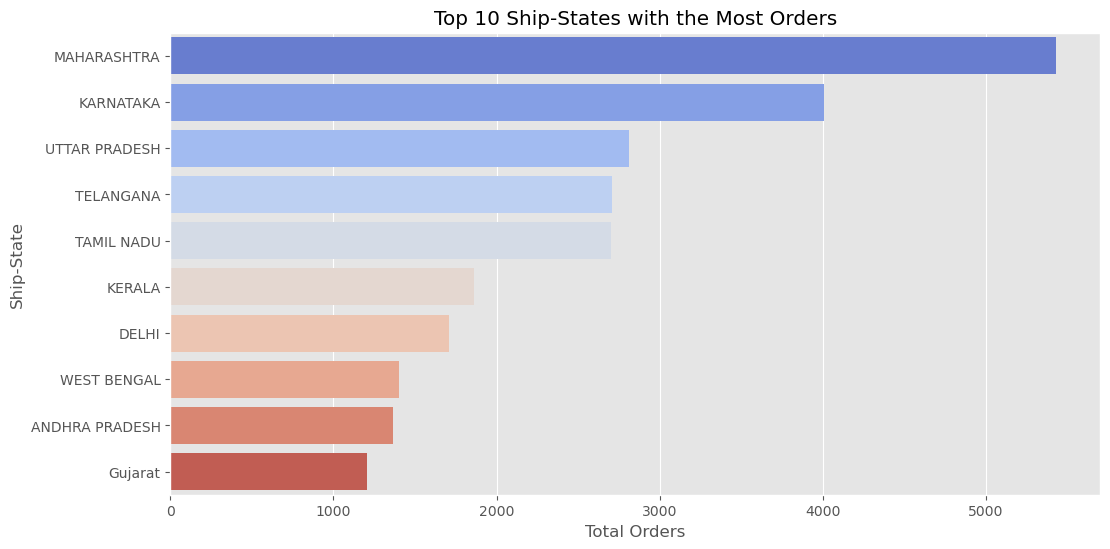

In [108]:
# Visualize the top 10 ship-states
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Orders', y='ship-state', data=state_orders.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Ship-State')
plt.show()

In [109]:
#16.What is the average revenue per shipping state or city?
# Group by ship-state and calculate average revenue
state_avg_revenue = ecommerce_data.groupby('ship-state')['Amount'].mean().reset_index()
state_avg_revenue = state_avg_revenue.rename(columns={'Amount': 'Average Revenue'})
state_avg_revenue = state_avg_revenue.sort_values(by='Average Revenue', ascending=False)

# Group by ship-city and calculate average revenue
city_avg_revenue = ecommerce_data.groupby('ship-city')['Amount'].mean().reset_index()
city_avg_revenue = city_avg_revenue.rename(columns={'Amount': 'Average Revenue'})
city_avg_revenue = city_avg_revenue.sort_values(by='Average Revenue', ascending=False)
print("Top 10 Ship-States by Average Revenue:")
print(state_avg_revenue.head(10))

print("\nTop 10 Ship-Cities by Average Revenue:")
print(city_avg_revenue.head(10))


Top 10 Ship-States by Average Revenue:
     ship-state  Average Revenue
52        bihar      1432.000000
45       Sikkim      1186.000000
23       LADAKH       934.250000
24  LAKSHADWEEP       798.000000
44       SIKKIM       787.352941
53        delhi       778.000000
32     NAGALAND       764.305085
36       Orissa       764.000000
55       punjab       752.500000
10   Chandigarh       737.666667

Top 10 Ship-Cities by Average Revenue:
                   ship-city  Average Revenue
3364            SARDARSHAHAR      2598.000000
3180  RAJGARH CHURU DISTRICT      2372.000000
3329                SAINTHIA      1695.000000
2179            MAHENDRAGARH      1602.166667
1782                  KHATRA      1593.000000
3284                 Ramgarh      1523.000000
1580             Jajpur road      1523.000000
1574               Jadcherla      1523.000000
2282                  MAZBAT      1523.000000
250        BADARPUR RLY TOWN      1523.000000


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\368489121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Revenue', y='ship-state', data=state_avg_revenue.head(10), palette='coolwarm')


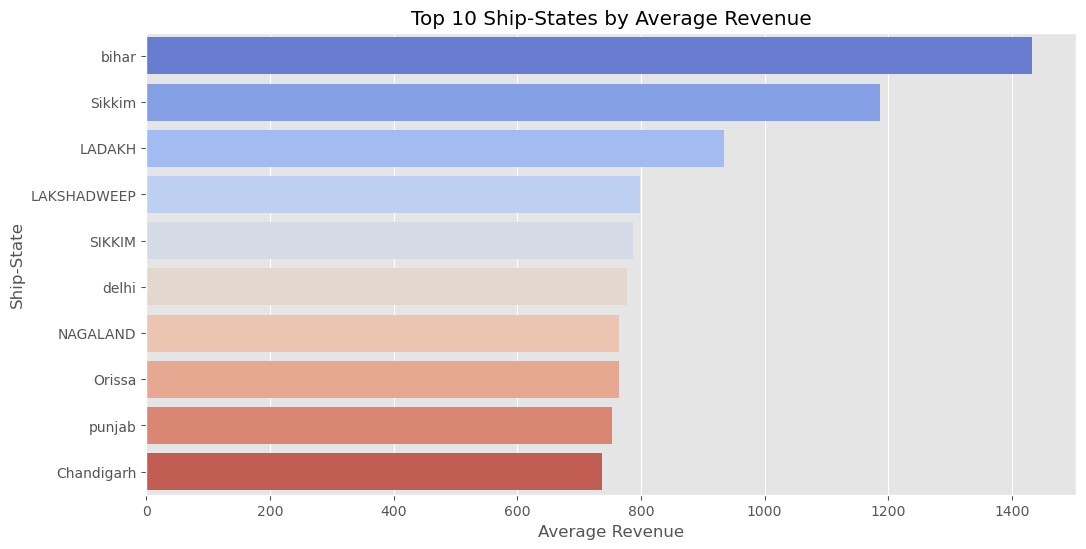

In [110]:
# Visualize Top 10 ship-states by average revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Revenue', y='ship-state', data=state_avg_revenue.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Ship-State')
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\1445987721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Revenue', y='ship-city', data=city_avg_revenue.head(10), palette='viridis')


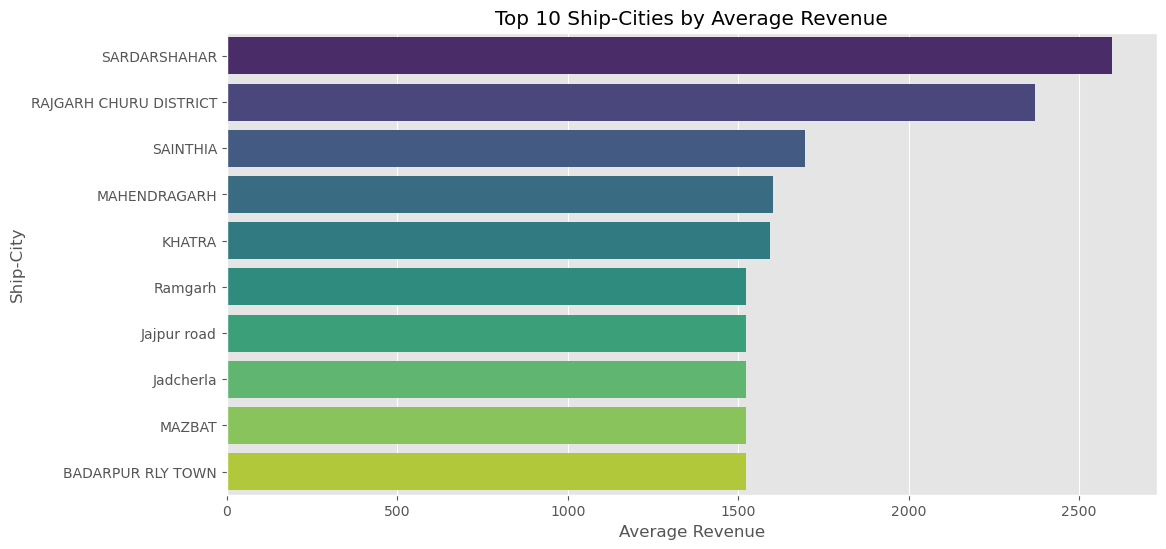

In [111]:
# Visualize Top 10 ship-cities by average revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Revenue', y='ship-city', data=city_avg_revenue.head(10), palette='viridis')
plt.title('Top 10 Ship-Cities by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Ship-City')
plt.show()

In [112]:
#17.Which states or cities have the highest cancellation rates?
cancelled_data = ecommerce_data[ecommerce_data['Status'].str.contains('Returned to Seller', case=False, na=False)]

state_cancellations = ecommerce_data.groupby('ship-state').size().reset_index(name='Total Orders')
cancelled_by_state = cancelled_data.groupby('ship-state').size().reset_index(name='Cancelled Orders')

# Merge the two datasets
state_cancellation_rate = state_cancellations.merge(cancelled_by_state, on='ship-state', how='left')
state_cancellation_rate['Cancelled Orders'].fillna(0, inplace=True)
state_cancellation_rate['Cancellation Rate'] = (state_cancellation_rate['Cancelled Orders'] / 
                                                state_cancellation_rate['Total Orders']) * 100


state_cancellation_rate = state_cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)

city_cancellations = ecommerce_data.groupby('ship-city').size().reset_index(name='Total Orders')
cancelled_by_city = cancelled_data.groupby('ship-city').size().reset_index(name='Cancelled Orders')

# Merge the two datasets
city_cancellation_rate = city_cancellations.merge(cancelled_by_city, on='ship-city', how='left')
city_cancellation_rate['Cancelled Orders'].fillna(0, inplace=True)
city_cancellation_rate['Cancellation Rate'] = (city_cancellation_rate['Cancelled Orders'] / 
                                               city_cancellation_rate['Total Orders']) * 100

city_cancellation_rate = city_cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)

In [113]:
print("Top 10 Ship-States by Cancellation Rate:")
print(state_cancellation_rate.head(10))

print("\nTop 10 Ship-Cities by Cancellation Rate:")
print(city_cancellation_rate.head(10))

Top 10 Ship-States by Cancellation Rate:
         ship-state  Total Orders  Cancelled Orders  Cancellation Rate
7             Bihar             7               3.0          42.857143
10       Chandigarh             3               1.0          33.333333
35           Odisha             4               1.0          25.000000
23           LADAKH             8               2.0          25.000000
53            delhi             5               1.0          20.000000
29          MIZORAM            19               3.0          15.789474
3             ASSAM           474              60.0          12.658228
44           SIKKIM            51               6.0          11.764706
20        JHARKHAND           394              46.0          11.675127
19  JAMMU & KASHMIR           197              20.0          10.152284

Top 10 Ship-Cities by Cancellation Rate:
                       ship-city  Total Orders  Cancelled Orders  \
2007                  Kendrapara             1               1.0   


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\2191620725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='ship-state', data=state_cancellation_rate.head(10), palette='coolwarm')


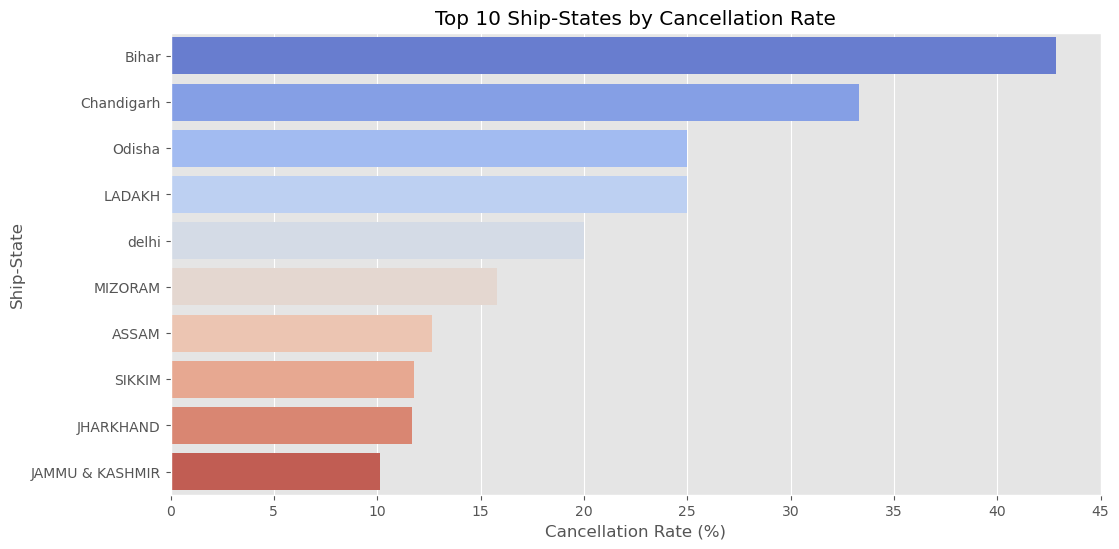

In [114]:
# Visualize Top 10 ship-states by cancellation rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation Rate', y='ship-state', data=state_cancellation_rate.head(10), palette='coolwarm')
plt.title('Top 10 Ship-States by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Ship-State')
plt.show()


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\3204495465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='ship-city', data=city_cancellation_rate.head(10), palette='viridis')


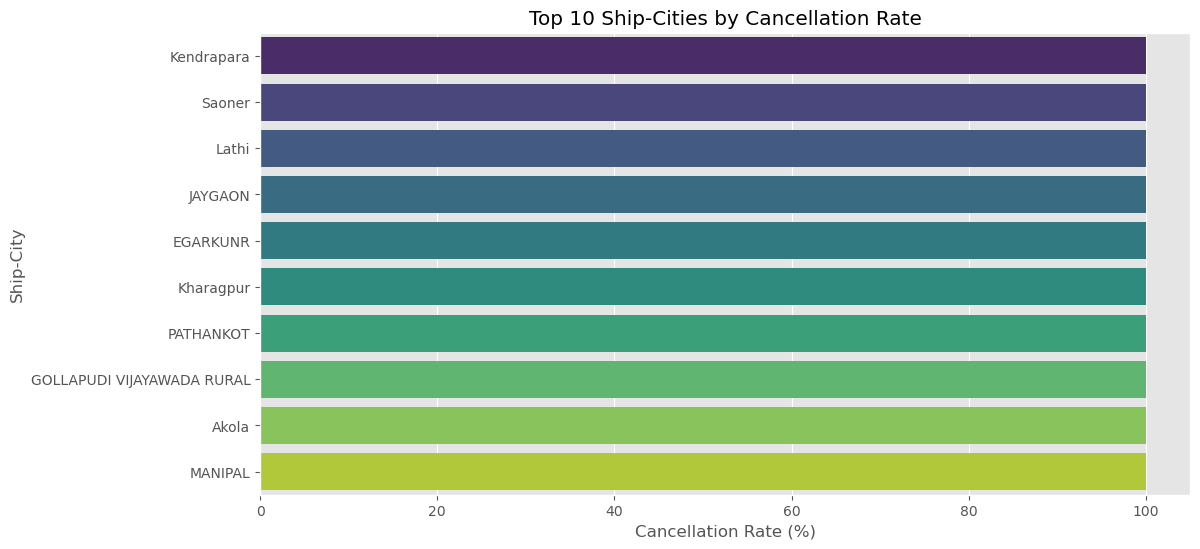

In [115]:
# Visualize Top 10 ship-cities by cancellation rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation Rate', y='ship-city', data=city_cancellation_rate.head(10), palette='viridis')
plt.title('Top 10 Ship-Cities by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Ship-City')
plt.show()

In [116]:
#18.How many orders included promotion-ids?

orders_with_promotions = ecommerce_data[ecommerce_data['promotion-ids'].notna() & 
                                       (ecommerce_data['promotion-ids'] != '')]

# Count the total number of such orders
num_orders_with_promotions = len(orders_with_promotions)

# Display the result
print(f"Total number of orders that included promotion-ids: {num_orders_with_promotions}")


Total number of orders that included promotion-ids: 32395


In [117]:
#19.What is the average revenue of promoted vs. non-promoted orders?
ecommerce_data['Is_Promoted'] = ecommerce_data['promotion-ids'].apply(
    lambda x: False if x in ['No Promotion', None, ''] else True
)

# Group by promotion status and calculate average revenue
promotion_comparison = ecommerce_data.groupby('Is_Promoted')['Amount'].mean().reset_index()
promotion_comparison = promotion_comparison.rename(columns={'Amount': 'Average Revenue'})

# Display the results
print("Average Revenue for Promoted vs. Non-Promoted Orders:")
print(promotion_comparison)

Average Revenue for Promoted vs. Non-Promoted Orders:
   Is_Promoted  Average Revenue
0        False       217.614035
1         True       651.285979


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_1988\3364214271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Promoted', y='Average Revenue', data=promotion_comparison, palette='coolwarm')


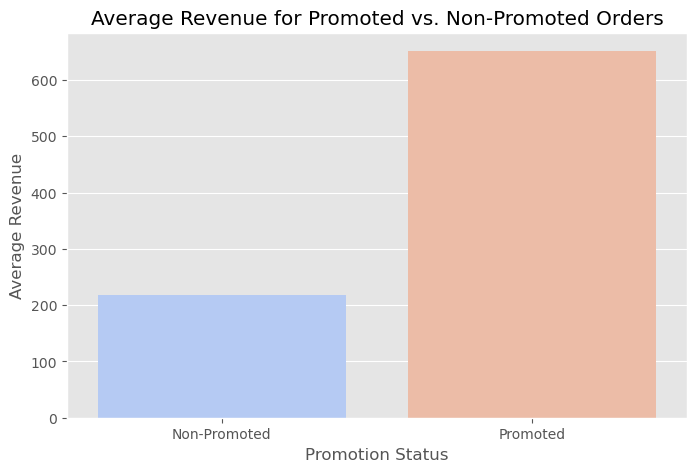

In [118]:
# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_Promoted', y='Average Revenue', data=promotion_comparison, palette='coolwarm')
plt.title("Average Revenue for Promoted vs. Non-Promoted Orders")
plt.xlabel("Promotion Status")
plt.ylabel("Average Revenue")
plt.xticks([0, 1], ["Non-Promoted", "Promoted"])
plt.show()

In [119]:
#20.Which promotions were the most frequently used?
promotion_usage = ecommerce_data['promotion-ids'].value_counts().reset_index()
promotion_usage.columns = ['Promotion ID', 'Usage Count']

top_promotions = promotion_usage.head(10)
print("Top 10 Most Frequently Used Promotions:")
print(top_promotions)


Top 10 Most Frequently Used Promotions:
                                        Promotion ID  Usage Count
0  Amazon PLCC Free-Financing Universal Merchant ...          458
1  Amazon PLCC Free-Financing Universal Merchant ...          316
2  Amazon PLCC Free-Financing Universal Merchant ...          305
3  Amazon PLCC Free-Financing Universal Merchant ...          230
4  Amazon PLCC Free-Financing Universal Merchant ...          206
5  Amazon PLCC Free-Financing Universal Merchant ...          201
6  Amazon PLCC Free-Financing Universal Merchant ...          198
7  Amazon PLCC Free-Financing Universal Merchant ...          171
8  Amazon PLCC Free-Financing Universal Merchant ...          163
9  Amazon PLCC Free-Financing Universal Merchant ...          146


In [131]:
#21.What is the split between orders fulfilled by Amazon and merchants?
fulfilment_split = ecommerce_data['Fulfilment'].value_counts().reset_index()
fulfilment_split.columns = ['Fulfilment Method', 'Order Count']

# Print the split between Amazon and Merchant fulfilled orders
print("Split Between Orders Fulfilled by Amazon and Merchants:")
print(fulfilment_split)

Split Between Orders Fulfilled by Amazon and Merchants:
  Fulfilment Method  Order Count
0          Merchant        32395


In [134]:
#22.What is the average order value for Amazon-fulfilled orders vs. Merchant-fulfilled?
ecommerce_data['Fulfilment'] = ecommerce_data['Fulfilment'].str.lower()

# Group by 'Fulfilment' and calculate the average order value (AOV)
average_order_value = ecommerce_data.groupby('Fulfilment')['Amount'].mean().reset_index()

# Rename columns for clarity
average_order_value.columns = ['Fulfilment Method', 'Average Order Value']

# Print the result
print("Average Order Value for Amazon-fulfilled vs. Merchant-fulfilled:")
print(average_order_value)



Average Order Value for Amazon-fulfilled vs. Merchant-fulfilled:
  Fulfilment Method  Average Order Value
0          merchant            650.52292


In [136]:
#23.What is the distribution of ship-service-level (Standard vs. Expedited)?
print("Unique values in 'ship-service-level' column before cleaning:")
print(ecommerce_data['ship-service-level'].unique())

# Clean column for consistent casing (if needed)
ecommerce_data['ship-service-level'] = ecommerce_data['ship-service-level'].str.lower()

# Calculate the distribution of ship-service-level
ship_service_distribution = ecommerce_data['ship-service-level'].value_counts().reset_index()
ship_service_distribution.columns = ['Ship Service Level', 'Order Count']

# Print the distribution
print("\nDistribution of Ship Service Levels:")
print(ship_service_distribution)

Unique values in 'ship-service-level' column before cleaning:
['Standard']

Distribution of Ship Service Levels:
  Ship Service Level  Order Count
0           standard        32395


________________________________________
# Inferential Analysis Questions
________________________________________



| Question | Type of Analysis                     | Statistical Test     |
|----------|--------------------------------------|----------------------|
| 1. Is there a significant difference in average revenue across different product categories? | Compare means        | ANOVA                |
| 2. Is there a significant difference in sales (revenue) across months for standard shipping orders?       | Compare two means    | ANOVA               |
| 3. Are orders with promotions significantly different in revenue compared to those without promotions? | Compare two means    | t-test               |
| 4. Is there a difference in average Qty sold across product categories?                     | Compare means        | ANOVA                |
| 5. Does the order cancellation rate vary significantly across ship-state or ship-city?      | Compare proportions  | Chi-Square test      |
| 6. Is there a correlation between Qty and Amount?                                           | Relationship         | Pearson Correlation  |
| 7. Does the Status of an order relate to fulfillment methods?                               | Association          | Chi-Square test      |
| 8. Is there a relationship between the month of order placement and order cancellations?    | Association          | Chi-Square test      |
| 9. Do revenue and average order value differ significantly between Sales Channel types?     | Compare means        | ANOVA or t-test      |
| 10. Are monthly or seasonal revenue trends statistically significant?                      | Trend analysis       | ANOVA                |
| 11. Does the use of promotions significantly increase the total quantity sold?              | Compare means        | t-test               |
| 12. Is there a significant relationship between promotion-ids and order cancellation rates? | Association          | Chi-Square test      |
| 13. Are there statistically significant differences in revenue across different states or cities? | Compare means    | ANOVA                |
| 14. Does the shipping location influence the use of expedited service levels?               | Association          | Chi-Square test      |
| 15. Do different ship-service-level options result in different average order values?       | Compare means        | t-test               |
| 16. Is there a significant difference in cancellation rates across states or cities?        | Compare proportions  | Chi-Square test      |
| 17. Do orders with promotions have significantly higher average revenue?                   | Compare means        | t-test               |
| 18. Are there significant differences in average order quantity across product categories?  | Compare means        | ANOVA                |
| 19. Is there a relationship between order quantity and order value?                         | Relationship         | Pearson Correlation  |
| 20. Are certain ship-service-level options associated with higher cancellation rates?       | Association          | Chi-Square test      |


In [157]:
#1. Is there a significant difference in average revenue across different product categories?

import pandas as pd
from scipy.stats import f_oneway

category_groups = [group['Amount'].values for name, group in ecommerce_data.groupby('Category')]

# ANOVA Test
f_statistic, p_value = f_oneway(*category_groups)

print("ANOVA Test Results for Average Revenue across Product Categories")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("\nThere is a significant difference in average revenue across product categories.")
else:
    print("\nThere is no significant difference in average revenue across product categories.")



ANOVA Test Results for Average Revenue across Product Categories
F-Statistic: 2650.77
P-Value: 0.00000

There is a significant difference in average revenue across product categories.


Since P-Value is less than 0.05, we can conclude that there is a significant difference in average income across product categories. To see where the difference comes from, you can use the Tukey HSD test. This test identifies differences between pairs.

In [159]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test
tukey = pairwise_tukeyhsd(endog=ecommerce_data['Amount'],      # Dependent variable (Revenue)
                          groups=ecommerce_data['Category'],  # Grouping variable (Category)
                          alpha=0.05)                        # Significance level

# Print Tukey HSD results
print("Tukey HSD Test Results:")
print(tukey)


Tukey HSD Test Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
       Blouse        Bottom -163.1786    0.0 -237.9992  -88.3579   True
       Blouse  Ethnic Dress  197.0283    0.0  130.3608  263.6958   True
       Blouse         Saree   322.654    0.0  173.1957  472.1122   True
       Blouse           Set  320.1888    0.0   269.036  371.3416   True
       Blouse           Top  -12.2327  0.997  -65.1184   40.6529  False
       Blouse Western Dress  236.5157    0.0  184.9554   288.076   True
       Blouse         kurta  -54.4613 0.0275 -105.6289   -3.2937   True
       Bottom  Ethnic Dress  360.2069    0.0   290.294  430.1197   True
       Bottom         Saree  485.8325    0.0  334.8987  636.7664   True
       Bottom           Set  483.3674    0.0  428.0514  538.6834   True
       Bottom           Top  150.9458   

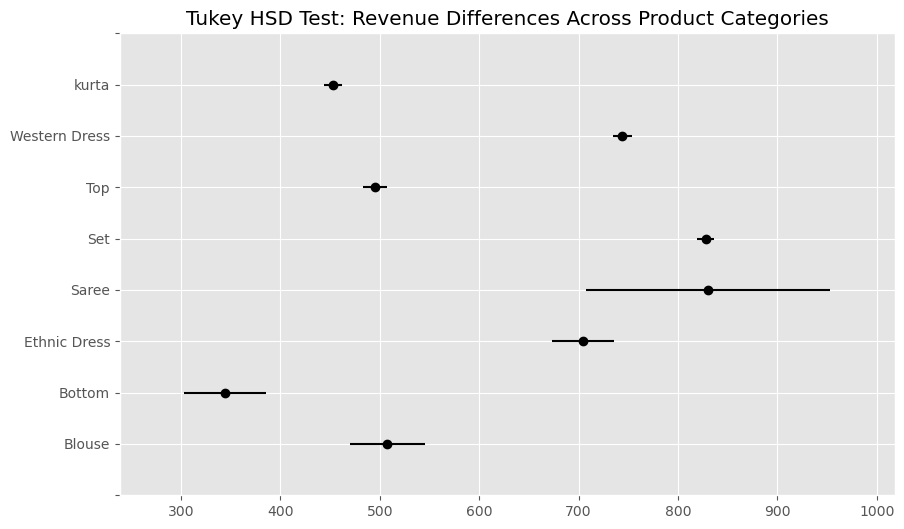

In [160]:
tukey.plot_simultaneous()
plt.title("Tukey HSD Test: Revenue Differences Across Product Categories")
plt.show()


The Tukey plot visually identifies the categories (e.g., Set, Saree) with higher revenue compared to others. The "Bottom" and "Blouse" categories show notably lower revenues. 

In [168]:
#2.Is there a significant difference in sales (revenue) across months for standard shipping orders?
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'])

standard_shipping = ecommerce_data[ecommerce_data['ship-service-level'] == 'standard']

standard_shipping['Month'] = standard_shipping['Date'].dt.month_name()

monthly_revenue_groups = [group['Amount'].values for name, group in standard_shipping.groupby('Month')]

f_statistic, p_value = f_oneway(*monthly_revenue_groups)

# Display results
print("ANOVA Test Results for Sales Across Months (Standard Shipping):")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("\nThere is a significant difference in sales across months for standard shipping orders.")
else:
    print("\nThere is no significant difference in sales across months for standard shipping orders.")


ANOVA Test Results for Sales Across Months (Standard Shipping):
F-Statistic: 99.00
P-Value: 0.00000

There is a significant difference in sales across months for standard shipping orders.


In [172]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD Test
tukey = pairwise_tukeyhsd(endog=standard_shipping['Amount'], 
                          groups=standard_shipping['Month'], 
                          alpha=0.05)

# Print Tukey HSD Test Results
print("Tukey HSD Test Results for Sales Across Months (Standard Shipping):")
print(tukey)


Tukey HSD Test Results for Sales Across Months (Standard Shipping):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 April   June  61.9771    0.0   51.7272   72.227   True
 April  March   17.222 0.9945 -159.6271 194.0711  False
 April    May  48.8879    0.0   39.4722  58.3036   True
  June  March -44.7551 0.9156 -221.6699 132.1597  False
  June    May -13.0892 0.0081  -23.6675   -2.511   True
 March    May  31.6659 0.9677 -145.2025 208.5344  False
-------------------------------------------------------


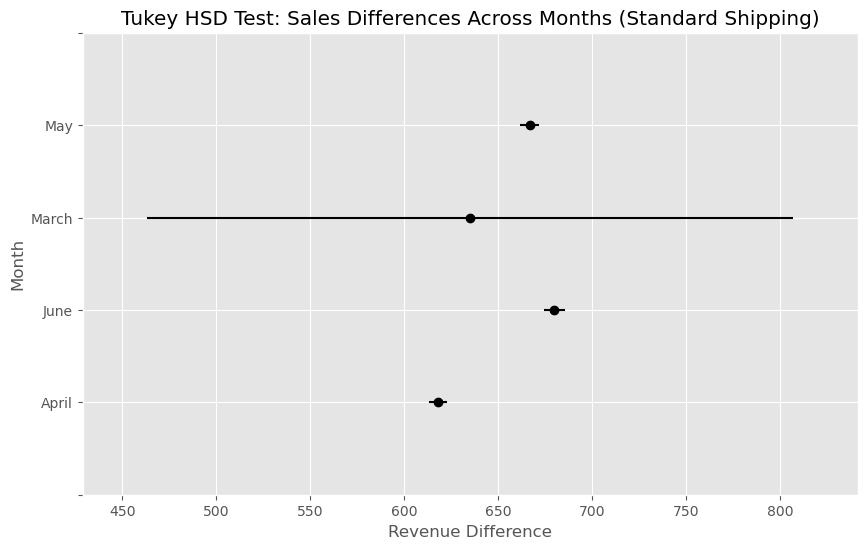

In [175]:
# Plot Tukey HSD Test Results
fig = tukey.plot_simultaneous()
plt.title("Tukey HSD Test: Sales Differences Across Months (Standard Shipping)")
plt.xlabel("Revenue Difference")
plt.ylabel("Month")
plt.grid(True)  # Add grid for better readability
plt.show()


- April has significantly higher revenues compared to both June and May.
- March does not show a statistically significant difference when compared with other months.

In [179]:
print("Number of promoted orders:", len(promoted_orders))
print("Number of non-promoted orders:", len(non_promoted_orders))


Number of promoted orders: 31579
Number of non-promoted orders: 0


In [178]:
#3. Are orders with promotions significantly different in revenue compared to those without promotions?

clean_data = ecommerce_data[(ecommerce_data['Amount'] > 0) & (ecommerce_data['Amount'].notnull())]


promoted_orders = clean_data[clean_data['promotion-ids'].notnull()]['Amount']
non_promoted_orders = clean_data[clean_data['promotion-ids'].isnull()]['Amount']

t_stat, p_value = ttest_ind(promoted_orders, non_promoted_orders, equal_var=False, nan_policy='omit')

# Display the results
print("T-Test Results for Revenue with and without Promotions:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("\nThere is a significant difference in revenue between promoted and non-promoted orders.")
else:
    print("\nThere is no significant difference in revenue between promoted and non-promoted orders.")



T-Test Results for Revenue with and without Promotions:
T-Statistic: nan
P-Value: nan

There is no significant difference in revenue between promoted and non-promoted orders.
